## Import Packages

In [193]:
import os
import lyricsgenius as genius
from datetime import datetime
import time
import pandas as pd
import json
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords as sw
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Collect the Data from Genius.com

In [1]:
#check current working directory to see where the lyrics will be saved
os.getcwd()

'C:\\Users\\marta\\Desktop\\Jupyter Notebook'

In [2]:
#Assign your Genius.com credentials and select your artist
geniusCreds = "d2EkHbZt9qVioplHYqHjU10pAfKgIruZkD3KFF7tagun-AU-7teGjc89k0PdXl00"
artist_name = "Taylor Swift"

In [16]:
#Connect your credentials and chosen artist to the genius object then test the first 5 songs
api = genius.Genius(geniusCreds, sleep_time=0.01, skip_non_songs = True, timeout=10)

In [ ]:
#words to exclude: demo, intro, responds, remix, tour, alternate, live, piano, list, discography, awards, voice, memo, acoustic, version, costumes, making of, grammys, foreword, poem, 30 things, hot 100 chart history, phone call, concert, playlist, speech, prologue, magazine, soundtrack, translation

In [21]:
#run this to gather all the data from Genius.com
start_time = datetime.now()

excluded = ['Demo', 'Intro', 'Responds', 'Remix', 'Tour', 'Alternate', 'Live', 'Piano', 'List', 'Discography', 'Awards', 
            'Voice', 'Memo', 'Acoustic', 'Version', 'Costumes', 'Making of', 'Grammys', 'Foreword', 'Poem', '30 Things', 
            'Chart History', 'Phone Call', 'Concert', 'Playlist', 'Speech', 'Prologue', 'Magazine', 'Soundtrack', 'Translation']

#Connect your credentials and chosen artist to the genius object then test the first 5 songs
api = genius.Genius(geniusCreds, sleep_time=0.01, skip_non_songs = True, excluded_terms = excluded, timeout=10)

try:
    artist = api.search_artist(artist_name)
except Exception as e:
    #artist = "null"
    #artist.album = "null"
    print("Error: ", e)
#time.sleep(60)

end_time = datetime.now()
print("\nCompleted at {}".format(start_time))
print("Total time to collect: {}".format(end_time - start_time))

#saves lyrics json file at the current directory
artist.save_lyrics()

Searching for songs by Taylor Swift...

Song 1: "​cardigan"
Song 2: "Lover"
Song 3: "​exile"
Song 4: "Look What You Made Me Do"
Song 5: "​the 1"
Song 6: "End Game"
Song 7: "ME!"
Song 8: "You Need To Calm Down"
Song 9: "...Ready for It?"
Song 10: "​august"
Song 11: "Blank Space"
Song 12: "​betty"
Song 13: "​my tears ricochet"
Song 14: "Delicate"
Song 15: "Call It What You Want"
"Bad Blood (Remix)" is not valid. Skipping.
"I Don’t Wanna Live Forever" is not valid. Skipping.
Song 16: "Cruel Summer"
Song 17: "​the last great american dynasty"
Song 18: "​invisible string"
Song 19: "Style"
Song 20: "Gorgeous"
Song 21: "​seven"
Song 22: "​illicit affairs"
Song 23: "​this is me trying"
Song 24: "The Man"
Song 25: "Don’t Blame Me"
Song 26: "I Did Something Bad"
Song 27: "Dress"
Song 28: "​mad woman"
Song 29: "​peace"
Song 30: "The Archer"
Song 31: "​mirrorball"
Song 32: "Bad Blood"
Song 33: "Getaway Car"
Song 34: "Miss Americana & The Heartbreak Prince"
Song 35: "London Boy"
Song 36: "Cornelia 

Song 200: "Gracie"
Song 201: "Just South of Knowing Why"
Song 202: "My Turn To Be Me"
Song 203: "Matches"
Song 204: "Perfect Have I Loved"
Song 205: "Sunshine"
"​cardigan (cabin in candlelight version)" is not valid. Skipping.
Song 206: "Don’t Hate Me For Loving You"
Song 207: "Firefly"
"The 1989 World Tour - Special Guests" is not valid. Skipping.
Song 208: "We Are Never Ever Getting Back Together/This Is Why We Can’t Have Nice Things"
Song 209: "Thirteen Blocks (Can’t Call It Love)"
"Delicate (Seeb Remix)" is not valid. Skipping.
Song 210: "My Cure"
Song 211: "Riptide"
Song 212: "Run"
Song 213: "You Do"
Song 214: "Breathless"
Song 215: "Smokey Black Nights"
Song 216: "Sugar"
Song 217: "Family"
Song 218: "Honey Baby"
"A Place In This World (Live from SoHo)" is not valid. Skipping.
Song 219: "What To Wear"
Song 220: "Brand New World"
Song 221: "Lucky You"
Song 222: "Your Face"
Song 223: "American Girl"
Song 224: "Point of View"
"Fearless Tour Setlist" is not valid. Skipping.
Song 225: 

"The T. Swift Dress at the American Music Awards (AMA)" is not valid. Skipping.
"Tim McGraw (Live from SoHo)" is not valid. Skipping.
"Speak Now (Live/2011)" is not valid. Skipping.
"The Story Of Us (Live/2011)" is not valid. Skipping.
"Live Album Discography" is not valid. Skipping.
"Taylor Swift - folklore [Foreword] (Srpski Prevod)" is not valid. Skipping.
"Enchanted (Live/2011)" is not valid. Skipping.
"Long Live (Live/2011)" is not valid. Skipping.
Song 314: "Political Instagram Post"
Song 315: "Teardrops On My Guitar (Cahill Radio Edit)"
"Should’ve Said No (Live from SoHo)" is not valid. Skipping.
"Dear John (Live/2011)" is not valid. Skipping.
"Mean (Live/2011)" is not valid. Skipping.
"Mine (Live/2011)" is not valid. Skipping.
"Fearless (Live From Clear Channel Stripped 2008)" is not valid. Skipping.
"Haunted (Live/2011)" is not valid. Skipping.
Song 316: "Love Story (Pop Mix)"
"Beautiful Eyes (Live From Clear Channel Stripped 2008)" is not valid. Skipping.
Song 317: "Rare Peer

## Import JSON File and Create DataFrame to Analyse Lyrics

In [253]:
#open saved json file of lyrics
with open('Lyrics_TaylorSwift.json') as json_data:
    Artist = json.load(json_data)

In [254]:
#test and check for specific info here:

print(Artist['songs'][0]['lyrics'])

[Verse 1]
Vintage tee, brand new phone
High heels on cobblestones
When you are young, they assume you know nothing
Sequin smile, black lipstick
Sensual politics
When you are young, they assume you know nothing

[Chorus]
But I knew you
Dancin' in your Levi's
Drunk under a streetlight, I
I knew you
Hand under my sweatshirt
Baby, kiss it better, I

[Refrain]
And when I felt like I was an old cardigan
Under someone's bed
You put me on and said I was your favorite

[Verse 2]
A friend to all is a friend to none
Chase two girls, lose the one
When you are young, they assume you know nothing

[Chorus]
But I knew you
Playing hide-and-seek and
Giving me your weekends, I
I knew you
Your heartbeat on the High Line
Once in twenty lifetimes, I

[Refrain]
And when I felt like I was an old cardigan
Under someone's bed
You put me on and said I was your favorite

[Bridge]
To kiss in cars and downtown bars
Was all we needed
You drew stars around my scars
But now I'm bleedin'

[Chorus]
'Cause I knew you
St

In [3]:
#THIS IS NOT NEEDED ANYMORE (SEE CELL BELOW)

#Create an empty dictionary to store your songs and related data
artist_dict = {}
def collectSongData(adic):
    for song in adic:
        dps = list()
        title = song['title'] #song title
        url = song['url'] #genius url
        artist = song['primary_artist']['name'] #artist name(s)
        if song['album'] == None:
            album = "None"
        else:
            album = song['album']['name'] #album name
        song_id = song['id'] #genius id
        lyrics = re.sub("\n", " ", song['lyrics']) #song lyrics
        release_date = song['release_date'] #release date
        upload_date = song['description_annotation']['annotatable']['client_timestamps']['lyrics_updated_at'] #lyrics upload date
        annotations = song['annotation_count'] #total no. of annotations
        descr = song['description'] #song descriptions
    
        dps.append((title,url,artist,song_id,lyrics,release_date,upload_date,annotations,descr)) #append all to one tuple list
        artist_dict[title] = dps #assign list to song dictionary entry named after song title
    
collectSongData(Artist['songs'])

TypeError: expected string or bytes-like object

In [255]:
#Create empty lists for each field
title = []
url = []
artist = []
album = []
song_id = []
lyrics = []
release_date = []
featured_artists = []

def collectSongData2(adic):
    for song in adic:
        title.append(re.sub("\u200b", "", song['title'])) #song title
        url.append(song['url']) #genius url
        artist.append(song['primary_artist']['name']) #artist name(s)
        if song['album'] == None:
            album.append(None)
        else:
            album.append(song['album']['name']) #album name
        song_id.append(song['id']) #genius id
        lyric = str(song['lyrics'])
        lyric = re.sub("\n", " ", lyric)
        lyric = re.sub("\u2005", " ", lyric)
        lyrics.append(lyric) #song lyrics
        release_date.append(song['release_date']) #release date
        if song['featured_artists'] == []:
            featured_artists.append(None)
        else:
            featured_artists.append(song['featured_artists'][0]['name']) #featured artists
        #upload_date = song['description_annotation']['annotatable']['client_timestamps']['lyrics_updated_at'] #lyrics upload date
        #annotations = song['annotation_count'] #total no. of annotations
        #descr = song['description'] #song descriptions
    
        #dps.append((title,url,artist,song_id,lyrics,release_date,upload_date,annotations,descr)) #append all to one tuple list
        #artist_dict[title] = dps #assign list to song dictionary entry named after song title
    
collectSongData2(Artist['songs'])

artist_dict = {'Title' : title,
               'URL' : url,
               'Artist' : artist,
                'Album' : album,
                'Song ID' : song_id,
                'Lyrics' : lyrics,
                'Release Date' : release_date, 
                'Featured Artists' : featured_artists
}

In [68]:
artist_dict

{'Title': ['cardigan',
  'Lover',
  'exile',
  'Look What You Made Me Do',
  'the 1',
  'End Game',
  'ME!',
  'You Need To Calm Down',
  '...Ready for It?',
  'august',
  'Blank Space',
  'betty',
  'my tears ricochet',
  'Delicate',
  'Call It What You Want',
  'Cruel Summer',
  'the last great american dynasty',
  'invisible string',
  'Style',
  'Gorgeous',
  'seven',
  'illicit affairs',
  'this is me trying',
  'The Man',
  'Don’t Blame Me',
  'I Did Something Bad',
  'Dress',
  'mad woman',
  'peace',
  'The Archer',
  'mirrorball',
  'Bad Blood',
  'Getaway Car',
  'Miss Americana & The Heartbreak Prince',
  'London Boy',
  'Cornelia Street',
  'hoax',
  'epiphany',
  'Love Story',
  'Daylight',
  'King of My Heart',
  'Wildest Dreams',
  'I Forgot That You Existed',
  'Death by a Thousand Cuts',
  'New Year’s Day',
  'Paper Rings',
  'So It Goes...',
  'This is Why We Can’t Have Nice Things',
  'False God',
  'I Think He Knows',
  'All Too Well',
  'the lakes',
  'Soon You’ll 

In [256]:
songs_df = pd.DataFrame(artist_dict)

songs_df.tail()

,Title,URL,Artist,Album,Song ID,Lyrics,Release Date,Featured Artists
316,Rare Peer (Brenda Lee Tribute),https://genius.com/Taylor-swift-rare-peer-bren...,Taylor Swift,Woman Walk The Line,3284327,"I'm curled up in my mother's bed, staring inte...",2017-09-20,None
317,Love Story (Digital Dog Radio Mix),https://genius.com/Taylor-swift-love-story-dig...,Taylor Swift,Love Story - Single,5815935,[Intro] Ah-ah Ah-ah Ah-ah Ah-ah-ah-ah [Verse ...,None,None
318,You belong with me Greek translation,https://genius.com/Taylor-swift-you-belong-wit...,Taylor Swift,None,5866975,You're on the phone with your girlfriend Καθως...,2020-08-14,None
319,Blank space Greek translation,https://genius.com/Taylor-swift-blank-space-gr...,Taylor Swift,None,5875758,"""Blank Space"" Κενος χωρος Nice to meet you, w...",2020-08-17,None
320,Shake it off Greek translation,https://genius.com/Taylor-swift-shake-it-off-g...,Taylor Swift,None,5921895,"Taylor Swift Lyrics ""Shake It Off"" Λικνησου χο...",2020-09-01,None


In [257]:
#remove the bottom songs since they are not from albums
songs_df = songs_df.iloc[:-17]

songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             304 non-null    object
 1   URL               304 non-null    object
 2   Artist            304 non-null    object
 3   Album             274 non-null    object
 4   Song ID           304 non-null    int64 
 5   Lyrics            304 non-null    object
 6   Release Date      189 non-null    object
 7   Featured Artists  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 19.1+ KB


In [258]:
#remove [intro], etc from the lyrics and additional spaces
songs_df['Lyrics'] = songs_df['Lyrics'].str.replace(r"\[.*?\]", "").str.replace("\s+", " ").str.replace(r'[!"\$%&\()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', "") #.str.replace(r"\'", " ")
songs_df.head()

,Title,URL,Artist,Album,Song ID,Lyrics,Release Date,Featured Artists
0,cardigan,https://genius.com/Taylor-swift-cardigan-lyrics,Taylor Swift,folklore,5793984,Vintage tee brand new phone High heels on cob...,2020-07-24,None
1,Lover,https://genius.com/Taylor-swift-lover-lyrics,Taylor Swift,Lover,4508914,We could leave the Christmas lights up 'til J...,2019-08-16,None
2,exile,https://genius.com/Taylor-swift-exile-lyrics,Taylor Swift,folklore,5793983,I can see you standing honey With his arms ar...,2020-07-24,Bon Iver
3,Look What You Made Me Do,https://genius.com/Taylor-swift-look-what-you-...,Taylor Swift,reputation,3210592,I don't like your little games Don't like you...,2017-08-25,None
4,the 1,https://genius.com/Taylor-swift-the-1-lyrics,Taylor Swift,folklore,5794073,I'm doing good I'm on some new shit Been sayi...,2020-07-24,None


In [265]:
#Expand contractions
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                       "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                       "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                       "so's": "so as", "this's": "this is","that'd": "that would", 
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", 
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" ,
                       "Isn't":"is not", "\u200b":"", "It's": "it is","I'm": "I am","don't":"do not","did't":"did not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                       "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                       "you're": "you are", "you've": "you have", "'bout": "about", "takin'": "taking", "gon'": "going to"}

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [266]:
songs_df['Lyrics'] = songs_df['Lyrics'].apply(lambda x: clean_contractions(x, contraction_mapping))

In [271]:
#Remove stopwords
stopwords = sw.words('english')

songs_df['Lyrics'] = songs_df['Lyrics'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stopwords)]))
songs_df.head()

,Title,URL,Artist,Album,Song ID,Lyrics,Release Date,Featured Artists
0,cardigan,https://genius.com/Taylor-swift-cardigan-lyrics,Taylor Swift,folklore,5793984,vintage tee brand new phone high heels cobbles...,2020-07-24,None
1,Lover,https://genius.com/Taylor-swift-lover-lyrics,Taylor Swift,Lover,4508914,could leave christmas lights 'til january plac...,2019-08-16,None
2,exile,https://genius.com/Taylor-swift-exile-lyrics,Taylor Swift,folklore,5793983,see standing honey arms around body laughin' j...,2020-07-24,Bon Iver
3,Look What You Made Me Do,https://genius.com/Taylor-swift-look-what-you-...,Taylor Swift,reputation,3210592,like little games like tilted stage role made ...,2017-08-25,None
4,the 1,https://genius.com/Taylor-swift-the-1-lyrics,Taylor Swift,folklore,5794073,good new shit saying yes instead thought saw b...,2020-07-24,None


In [272]:
songs_df['Lyrics'].iloc[11]

"betty make assumptions switched homeroom think betty one time riding skateboard passed house like could breathe heard rumors inez cannot believe word says times time true worst thing ever showed party would would want would tell go fuck lead garden garden would trust told summer thing seventeen know anything know miss betty know went wrong favorite song playing far side gym nowhere found hate crowds know plus saw dance heard rumors inez cannot believe word says times time true worst thing ever showed party would would want would tell go fuck lead garden garden would trust told summer thing seventeen know anything know miss walking home broken cobblestones thinking pulled like figment worst intentions said james get let us drive days turned nights slept next dreamt summer long betty doorstep planned weeks finally sinkin' betty right last time dream happens see face thing wanna make showed party yeah showed party yeah showed party love kiss porch front stupid friends kiss like dreamed p

In [273]:
#remove songs without lyrics
songs_df = songs_df[~songs_df['Lyrics'].str.contains("have yet to be released")] #does not contain "have yet to be released"
songs_df = songs_df[songs_df['Lyrics'] != "None"]

songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 303
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             304 non-null    object
 1   URL               304 non-null    object
 2   Artist            304 non-null    object
 3   Album             274 non-null    object
 4   Song ID           304 non-null    int64 
 5   Lyrics            304 non-null    object
 6   Release Date      189 non-null    object
 7   Featured Artists  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 21.4+ KB


In [274]:
#find song by song title
#find = songs_df[songs_df['Title'] == "Christmas Tree Farm"]
find = songs_df[songs_df['Title'].str.contains("Heart")]

find

,Title,URL,Artist,Album,Song ID,Lyrics,Release Date,Featured Artists
33,Miss Americana & The Heartbreak Prince,https://genius.com/Taylor-swift-miss-americana...,Taylor Swift,Lover,4765976,know adore crazier 16 lost film scene waving h...,2019-08-23,None
40,King of My Heart,https://genius.com/Taylor-swift-king-of-my-hea...,Taylor Swift,reputation,3305019,perfectly fine live made mind better bein' alo...,2017-11-10,None
146,A Perfectly Good Heart,https://genius.com/Taylor-swift-a-perfectly-go...,Taylor Swift,Taylor Swift,132101,would wanna break perfectly good heart would w...,2007-11-06,None
163,I Heart ?,https://genius.com/Taylor-swift-i-heart-lyrics,Taylor Swift,Taylor Swift (Best Buy Exclusive),187203,wish concentrated said love complicated someth...,2008-06-23,None
237,Cross My Heart,https://genius.com/Taylor-swift-cross-my-heart...,Taylor Swift,Unreleased Songs,2466693,counting days patient little thing called love...,None,None
260,"Baby, Don’t You Break My Heart Slow",https://genius.com/Taylor-swift-baby-dont-you-...,Taylor Swift,None,187004,like way wanted every night long baby like way...,None,None


In [275]:
#Remove songs that contain Mix and Performance
songs_df = songs_df[~songs_df['Title'].str.contains("Mix")]
songs_df = songs_df[~songs_df['Title'].str.contains("Performance")]

In [276]:
#split by album
albums = songs_df['Album']

alb = albums.value_counts()
#pl_album = alb.plot(kind='bar')

#split by whether it has an album or not
album = songs_df[songs_df['Album'].isnull() == False]
no_album = songs_df[songs_df['Album'].isnull() == True]

In [277]:
#Remove songs that are from album Interviews
album = album[~album['Album'].str.contains("Interviews")]
album = album[album['Album'] != "Taylor Swift "]
album = album[album['Album'] != "Woman Walk The Line "]
album = album[~album['Album'].str.contains("One World")]

#To count how many songs are in each album
albums = album['Album']
alb = albums.value_counts()

album.head()

,Title,URL,Artist,Album,Song ID,Lyrics,Release Date,Featured Artists
0,cardigan,https://genius.com/Taylor-swift-cardigan-lyrics,Taylor Swift,folklore,5793984,vintage tee brand new phone high heels cobbles...,2020-07-24,None
1,Lover,https://genius.com/Taylor-swift-lover-lyrics,Taylor Swift,Lover,4508914,could leave christmas lights 'til january plac...,2019-08-16,None
2,exile,https://genius.com/Taylor-swift-exile-lyrics,Taylor Swift,folklore,5793983,see standing honey arms around body laughin' j...,2020-07-24,Bon Iver
3,Look What You Made Me Do,https://genius.com/Taylor-swift-look-what-you-...,Taylor Swift,reputation,3210592,like little games like tilted stage role made ...,2017-08-25,None
4,the 1,https://genius.com/Taylor-swift-the-1-lyrics,Taylor Swift,folklore,5794073,good new shit saying yes instead thought saw b...,2020-07-24,None


In [278]:
#To find songs by album
find = album[album['Album'].str.contains("Platinum")]
#find = album[album['Album'] == "Taylor Swift"]

find

,Title,URL,Artist,Album,Song ID,Lyrics,Release Date,Featured Artists
133,Jump Then Fall,https://genius.com/Taylor-swift-jump-then-fall...,Taylor Swift,Fearless (Platinum Edition),186898,like way sound morning phone without warning r...,2009-10-27,None
140,The Other Side of the Door,https://genius.com/Taylor-swift-the-other-side...,Taylor Swift,Fearless (Platinum Edition),186922,heat fight walked away ignoring words saying t...,2008-11-11,None
141,Come In With the Rain,https://genius.com/Taylor-swift-come-in-with-t...,Taylor Swift,Fearless (Platinum Edition),186911,could go back every laugh wanna go anymore kno...,2008-11-11,None
143,SuperStar,https://genius.com/Taylor-swift-superstar-lyrics,Taylor Swift,Fearless (Platinum Edition),186915,wrong cannot help feel like nothing right babe...,2008-11-11,None


In [ ]:
#Export to csv and Excel files
album.to_csv('Taylor Swift Songs & Lyrics.csv')
album.to_excel('Taylor Swift Songs & Lyrics.xlsx')

In [279]:
#find songs by lyrics (in a specific album)
picked_album = 'folklore'
chosen_album = album[album['Album'].str.lower().str.contains(picked_album)]
chosen_album_by_lyrics = chosen_album[chosen_album['Lyrics'].str.lower().str.contains(" her ")]
chosen_album_by_lyrics

,Title,URL,Artist,Album,Song ID,Lyrics,Release Date,Featured Artists


In [280]:
##find songs by lyrics (for all songs)
songs_by_lyrics = songs_df[songs_df['Lyrics'].str.lower().str.contains("west village")]
songs_by_lyrics

,Title,URL,Artist,Album,Song ID,Lyrics,Release Date,Featured Artists
48,False God,https://genius.com/Taylor-swift-false-god-lyrics,Taylor Swift,Lover,4782865,crazy think crazy think could work remember sa...,2019-08-23,None


In [281]:
#value counts for the various words of interest
words = pd.Series(' '.join(album.Lyrics.str.lower()).split(r' ')).value_counts() #substitute album by songs_df if needed
words.head(10)

#look up how many times a word was used
#words.loc["you"]

oh       571
like     569
know     532
would    440
love     430
never    423
time     323
back     308
say      298
see      293
dtype: int64

In [282]:
songs_df['words'] = songs_df.Lyrics.str.lower().str.split(' ')

#Explode and count
songs = songs_df.explode('words').groupby('Album')['words'].value_counts() 

songs.head()

Album          words
1989 (Deluxe)  oh       121
               love      94
               shake     78
               ey        72
               yet       64
Name: words, dtype: int64

## Data Visualization

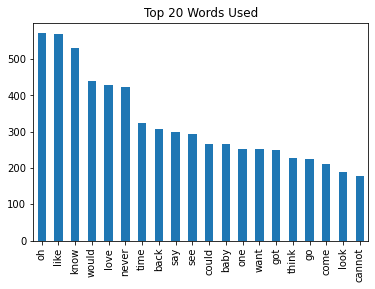

In [283]:
#Ngram - Top Words in Lyrics Overall
plot = words[:20].plot(kind='bar', title="Top 20 Words Used") #change value to slice

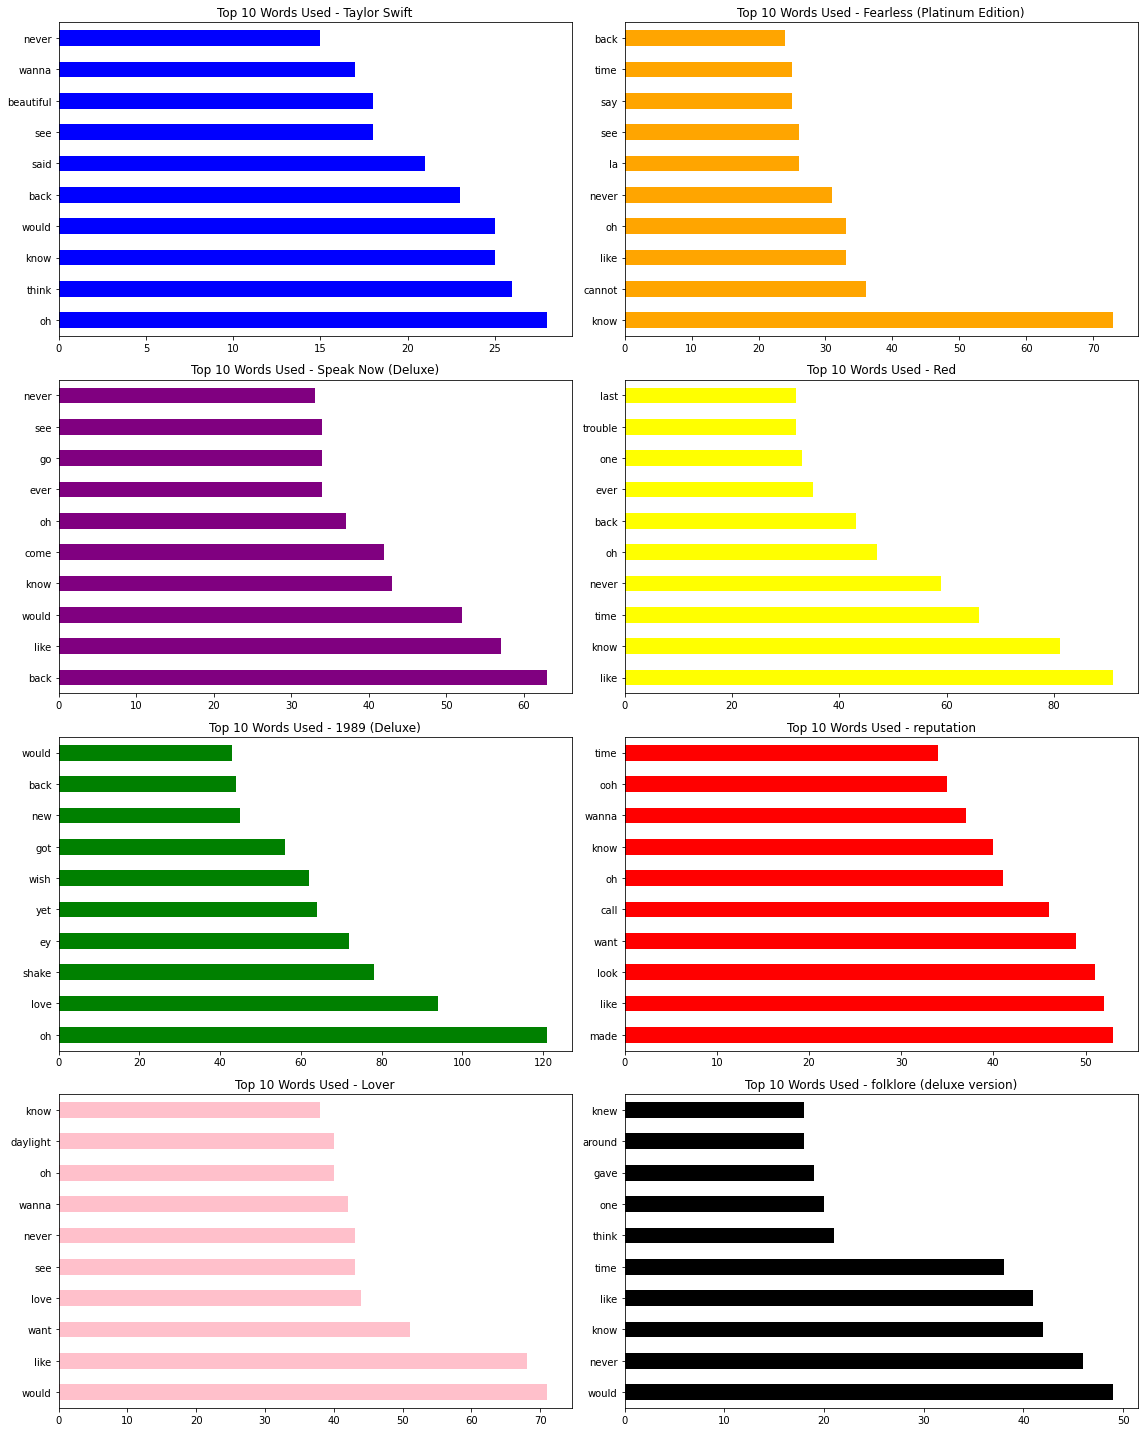

In [284]:
#Ngram - Top Words in Lyrics by Album

#First we filter so that we only have the full length albums (no singles, EPs, etc)
updated_albums = {'Fearless': 'Fearless (Platinum Edition)', 'folklore': 'folklore (deluxe version)'}
albums_list = ['Taylor Swift', 'Fearless (Platinum Edition)', 'Speak Now (Deluxe)', 'Red', '1989 (Deluxe)', 
               'reputation', 'Lover', 'folklore (deluxe version)']

filtered_df = songs_df
filtered_df['Album'].replace(updated_albums, inplace=True)
filtered_df = filtered_df[filtered_df.Album.isin(albums_list) == True]

fig = plt.figure(figsize=(16,20))

colours = ['blue', 'orange', 'purple', 'yellow', 'green', 'red', 'pink', 'black']

for i, album in enumerate(albums_list):
    alb = filtered_df[filtered_df['Album'] == album]
    words = pd.Series(' '.join(alb.Lyrics.str.lower()).split(r' ')).value_counts()[:10]
    title = f'Top 10 Words Used - {album}'
    fig.add_subplot(4,2,i+1)
    words.plot(kind='barh', color=colours[i])
    plt.title(title)

plt.tight_layout()
plt.show()

In [285]:
def ngram_extractor(text, n_gram):
    token = [token for token in (' '.join(text.str.lower())).split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

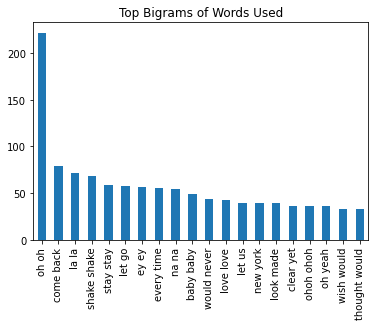

In [286]:
#Bigram - Overall
bigram = ngram_extractor(songs_df.Lyrics, 2)
words = pd.Series(bigram).value_counts()
plot = words[:20].plot(kind='bar', title="Top Bigrams of Words Used")

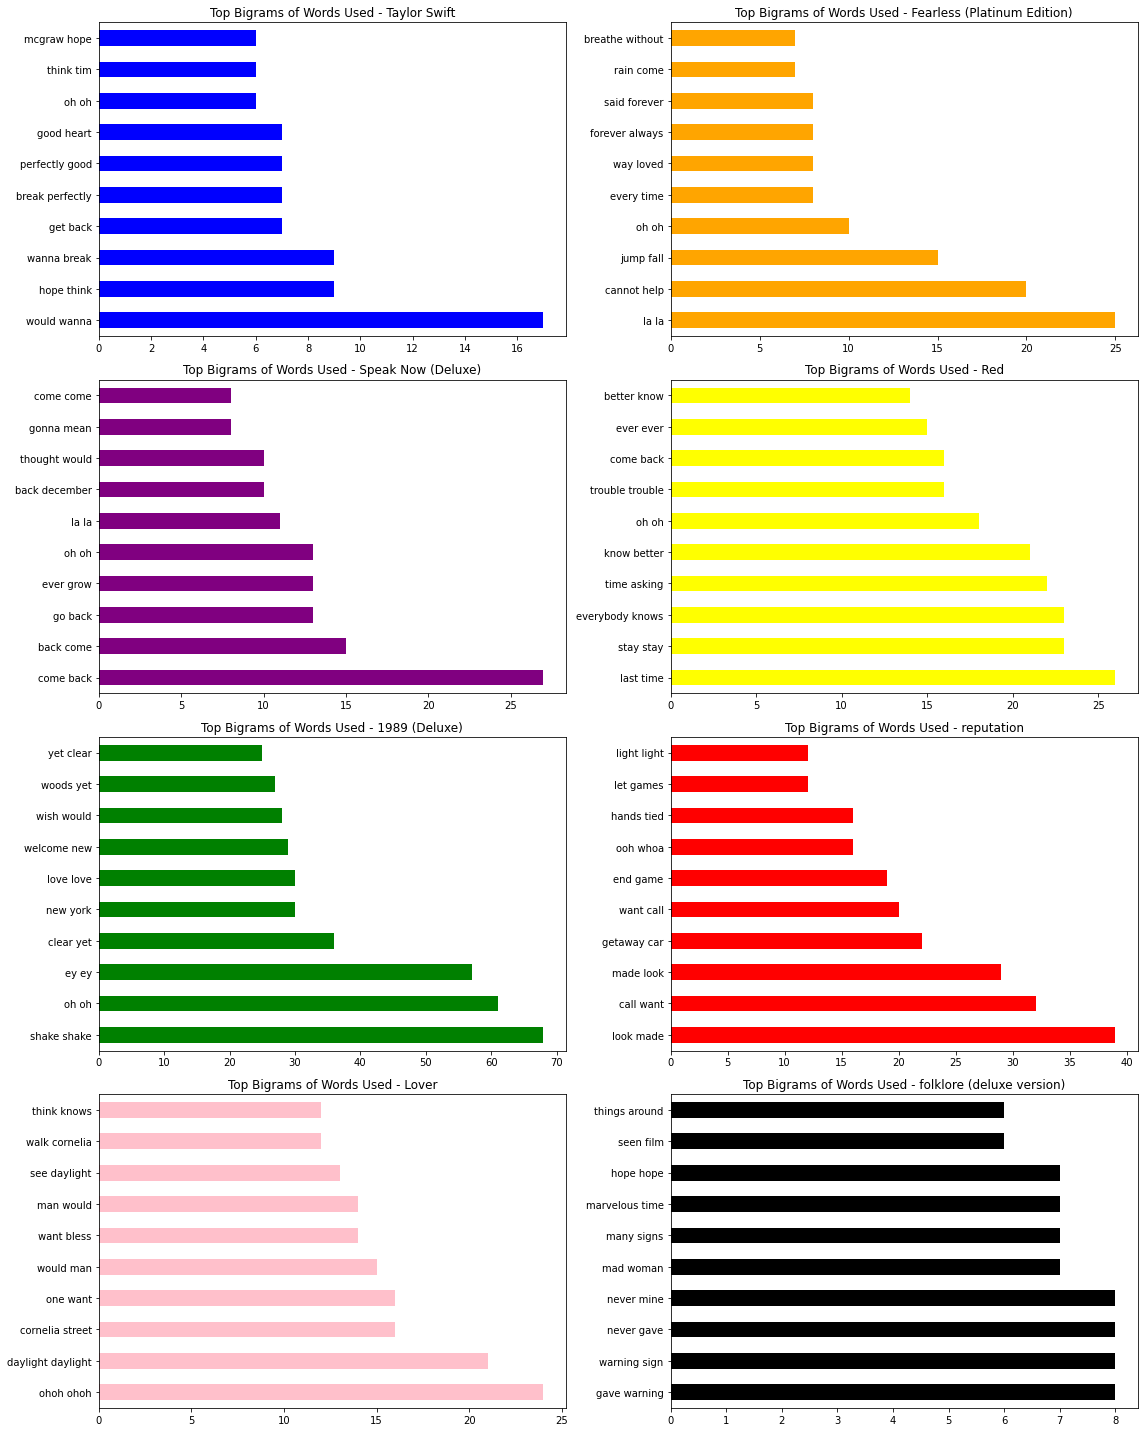

In [287]:
#Bigram - Top Words in Lyrics by Album

fig = plt.figure(figsize=(16,20))

for i, album in enumerate(albums_list):
    alb = filtered_df[filtered_df['Album'] == album]
    bigram = ngram_extractor(alb.Lyrics, 2)
    words = pd.Series(bigram).value_counts()[:10]
    title = f'Top Bigrams of Words Used - {album}'
    fig.add_subplot(4,2,i+1)
    words.plot(kind='barh', color=colours[i])
    plt.title(title)

plt.tight_layout()
plt.show()

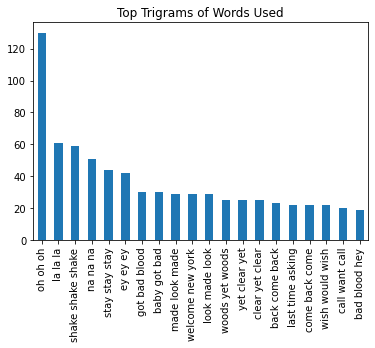

In [288]:
#Trigram - Overall
bigram = ngram_extractor(songs_df.Lyrics, 3)
words = pd.Series(bigram).value_counts()
plot = words[:20].plot(kind='bar', title="Top Trigrams of Words Used")

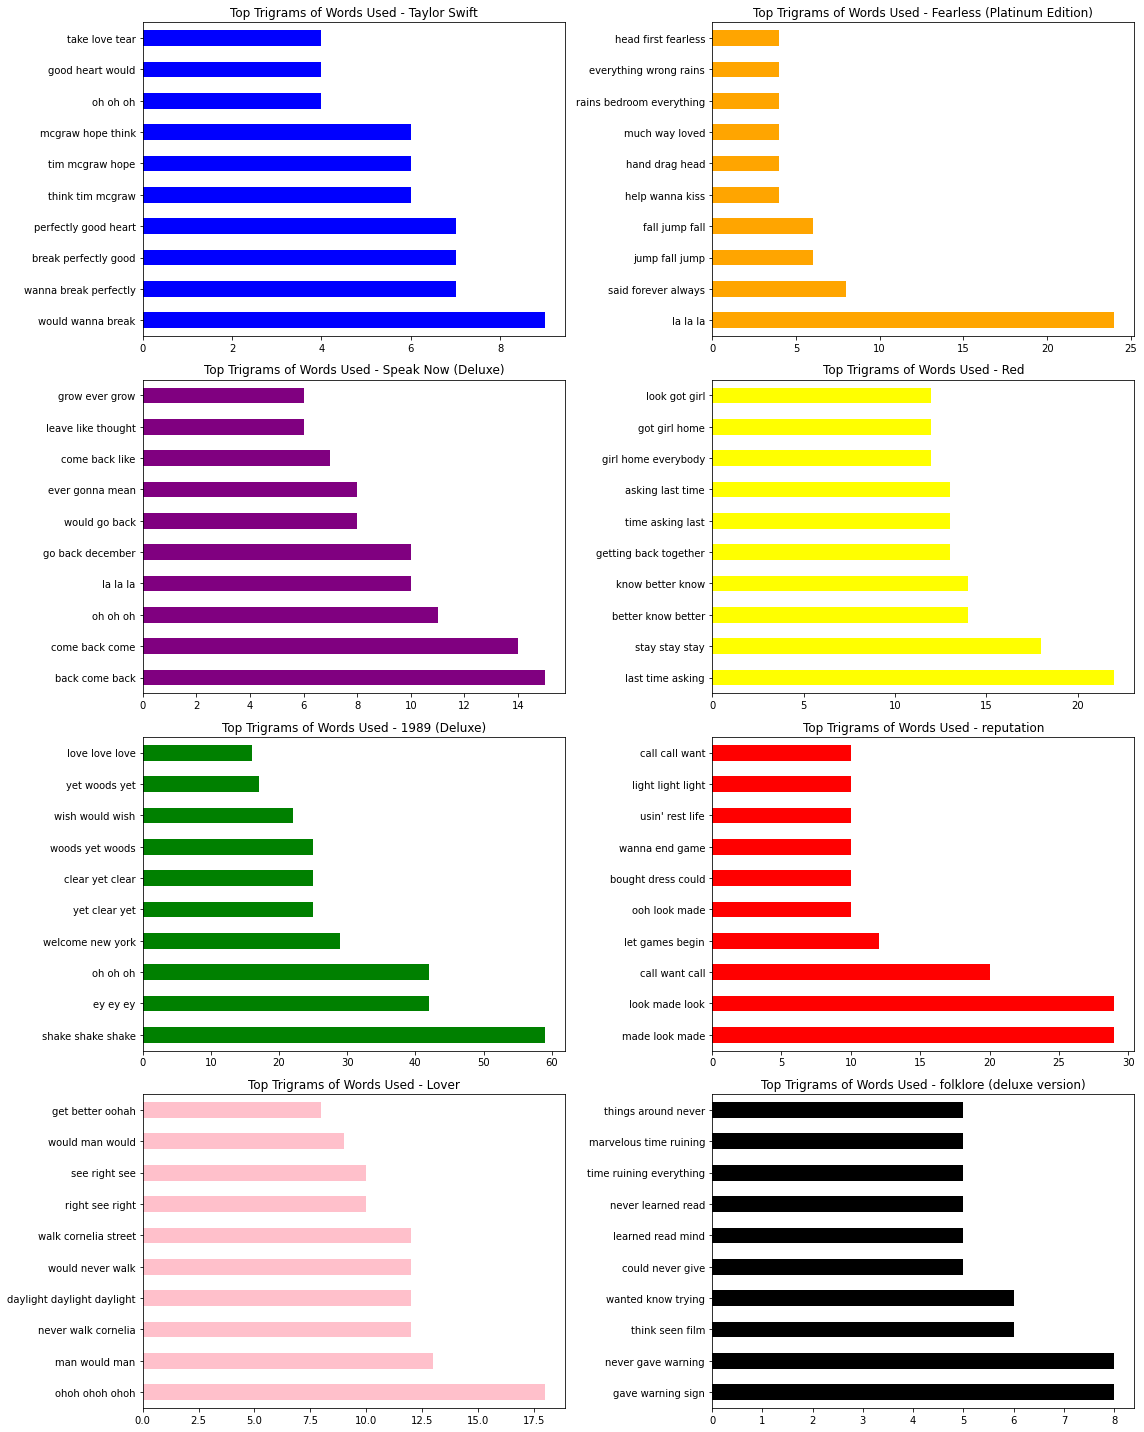

In [289]:
#Trigram - Top Words in Lyrics by Album

fig = plt.figure(figsize=(16,20))

for i, album in enumerate(albums_list):
    alb = filtered_df[filtered_df['Album'] == album]
    bigram = ngram_extractor(alb.Lyrics, 3)
    words = pd.Series(bigram).value_counts()[:10]
    title = f'Top Trigrams of Words Used - {album}'
    fig.add_subplot(4,2,i+1)
    words.plot(kind='barh', color=colours[i])
    plt.title(title)

plt.tight_layout()
plt.show()